In [ ]:
import numpy as np
import pandas as pd

#load the dataset
data = pd.read_csv("/content/titanic.csv")
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.shape

(891, 12)

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
data = data.drop(columns=['Name','Ticket'])
data.shape

(891, 10)

In [ ]:
data.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
data.isnull().sum()/data.shape[0]*100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Fare,0.000000
Cabin,77.104377
Embarked,0.224467


In [ ]:
data=data.drop(columns='Cabin')
data.shape

(891, 9)

In [ ]:
data.dropna(subset=['Embarked'],axis=0,inplace=True)
data.shape

(889, 9)

In [ ]:
data=data.fillna(data.Age.mean())
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


Text Analysis over Stack Overflow dataset--> kaggle


In [ ]:
!pip install Kaggle

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [ ]:
!kaggle datasets download stackoverflow/stack-overflow-2018-developer-survey


Dataset URL: https://www.kaggle.com/datasets/stackoverflow/stack-overflow-2018-developer-survey
License(s): DbCL-1.0
  0% 0.00/19.6M [00:00<?, ?B/s]
100% 19.6M/19.6M [00:00<00:00, 1.03GB/s]


In [ ]:
 !unzip /content/stack-overflow-2018-developer-survey.zip

Archive:  /content/stack-overflow-2018-developer-survey.zip
  inflating: survey_results_public.csv  
  inflating: survey_results_schema.csv  


In [ ]:
#import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/survey_results_public.csv")
df.shape
df.head()


/tmp/ipython-input-18-3914019911.py:1: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/survey_results_public.csv")


,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [ ]:
df_1 = pd.read_csv("/content/survey_results_schema.csv")
df_1.shape
df_1.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,Hobby,Do you code as a hobby?
2,OpenSource,Do you contribute to open source projects?
3,Country,In which country do you currently reside?
4,Student,"Are you currently enrolled in a formal, degree..."


In [ ]:
df.shape

(98855, 129)

In [ ]:
#Count the number of null values in each feacture
#Count the percentage of null values
#Draw the pie chart for the number of people who finds codding as hobby
#Determine the number of people contributing to open source projects
#Determine the top 20 countries where the resources are obtained
#Do other 5 analysis of own thinking (which involves different charts and graphs)


In [ ]:
null_counts = df.isnull().sum()
print(null_counts)

df.shape

Respondent           0
Hobby                0
OpenSource           0
Country            412
Student           3954
                 ...  
Age              34281
Dependents       36259
MilitaryUS       83074
SurveyTooLong    32914
SurveyEasy       32976
Length: 129, dtype: int64


(98855, 129)

In [ ]:
null_percentage = (df.isnull().sum() / len(df)) * 100
print(null_percentage)

Respondent        0.000000
Hobby             0.000000
OpenSource        0.000000
Country           0.416772
Student           3.999798
                   ...    
Age              34.678064
Dependents       36.678974
MilitaryUS       84.036215
SurveyTooLong    33.295230
SurveyEasy       33.357949
Length: 129, dtype: float64


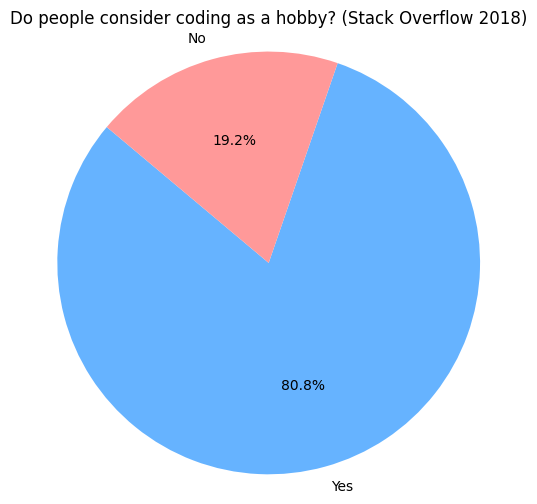

Index(['Respondent', 'Hobby', 'OpenSource', 'Country', 'Student', 'Employment',
       'FormalEducation', 'UndergradMajor', 'CompanySize', 'DevType',
       ...
       'Exercise', 'Gender', 'SexualOrientation', 'EducationParents',
       'RaceEthnicity', 'Age', 'Dependents', 'MilitaryUS', 'SurveyTooLong',
       'SurveyEasy'],
      dtype='object', length=129)


In [ ]:
hobby_counts = df['Hobby'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6,6))
plt.pie(hobby_counts, labels=hobby_counts.index, autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'], startangle=140)
plt.title("Do people consider coding as a hobby? (Stack Overflow 2018)")
plt.axis('equal')
plt.show()
print(df.columns)

In [ ]:
open_source_counts = df['OpenSource'].value_counts()
print(open_source_counts)

OpenSource
No     55769
Yes    43086
Name: count, dtype: int64


Top 20 countries by number of respondents:
Country
United States         20309
India                 13721
Germany                6459
United Kingdom         6221
Canada                 3393
Russian Federation     2869
France                 2572
Brazil                 2505
Poland                 2122
Australia              2018
Netherlands            1841
Spain                  1769
Italy                  1535
Ukraine                1279
Sweden                 1164
Pakistan               1050
China                  1037
Switzerland            1010
Turkey                 1004
Israel                 1003
Name: count, dtype: int64


/tmp/ipython-input-30-1501666556.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")


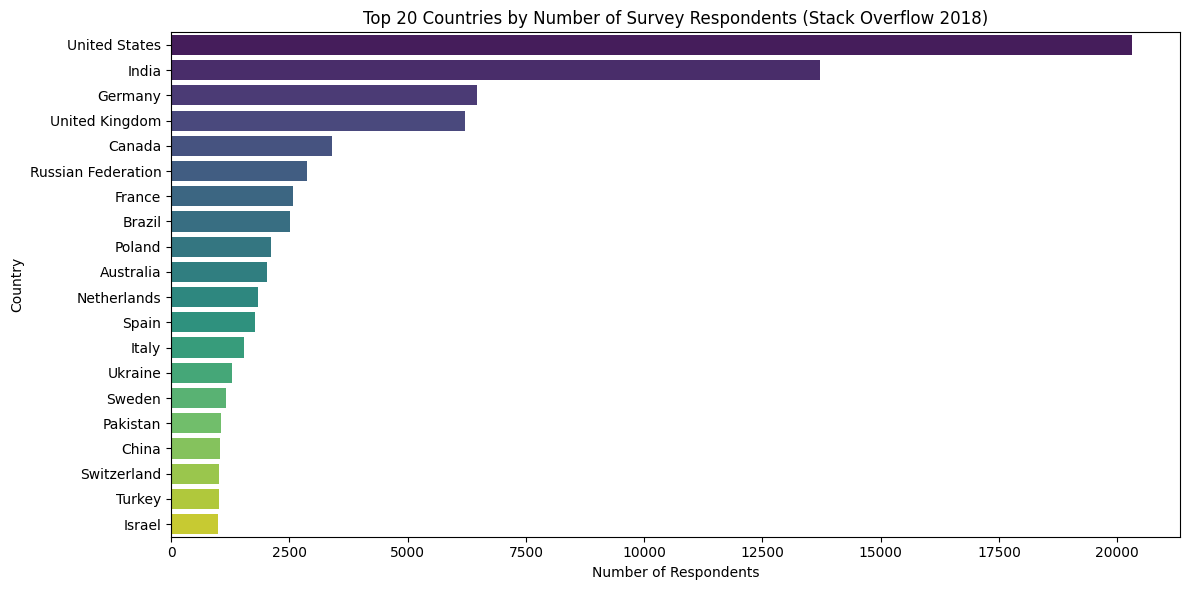

In [ ]:
top_countries = df['Country'].value_counts().head(20)
print("Top 20 countries by number of respondents:")
print(top_countries)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.xlabel("Number of Respondents")
plt.ylabel("Country")
plt.title("Top 20 Countries by Number of Survey Respondents (Stack Overflow 2018)")
plt.tight_layout()
plt.show()

1.Which programming language is most popular?

/tmp/ipython-input-32-3636385984.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_langs.values, y=top_langs.index, palette="cubehelix")


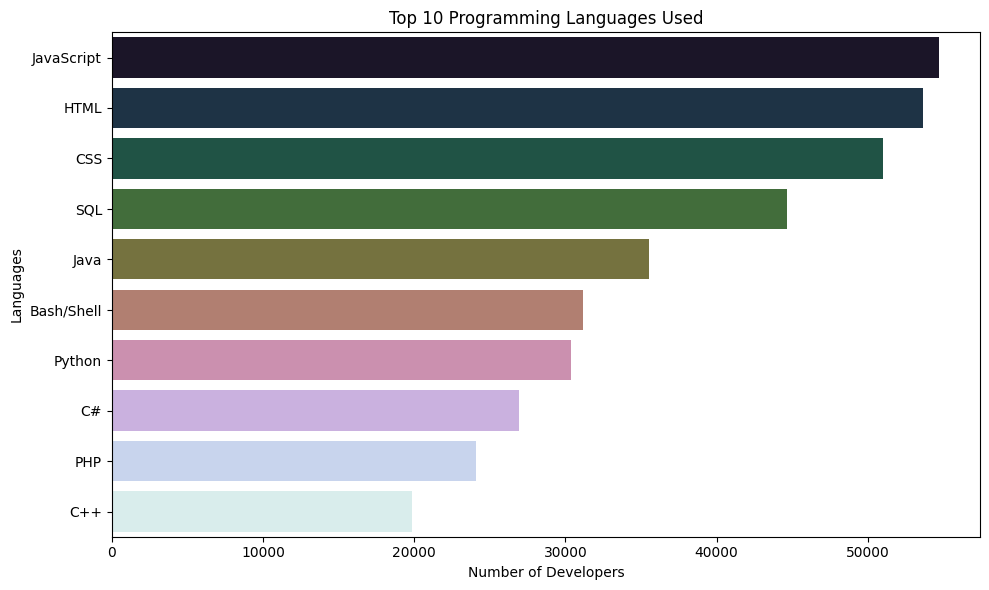

In [ ]:
from collections import Counter

lang_series = df['LanguageWorkedWith'].dropna().str.split(';')
all_languages = Counter([lang for sublist in lang_series for lang in sublist])

top_langs = pd.Series(dict(all_languages)).sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_langs.values, y=top_langs.index, palette="cubehelix")
plt.title("Top 10 Programming Languages Used")
plt.xlabel("Number of Developers")
plt.ylabel("Languages")
plt.tight_layout()
plt.show()A

2.Salary Distribution

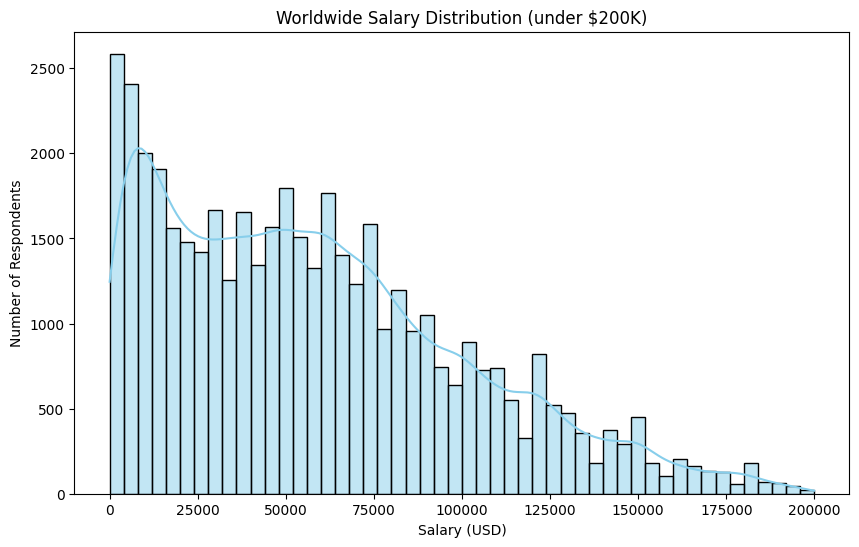

In [ ]:
salary = df['ConvertedSalary'].dropna()
salary = salary[salary < 200000]  # Remove outliers above $200K

plt.figure(figsize=(10,6))
sns.histplot(salary, bins=50, kde=True, color="skyblue")
plt.title("Worldwide Salary Distribution (under $200K)")
plt.xlabel("Salary (USD)")
plt.ylabel("Number of Respondents")
plt.show()

3. Which Formal Education Level is Most Common?


/tmp/ipython-input-34-1444516669.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=edu_counts.values, y=edu_counts.index, palette="pastel")


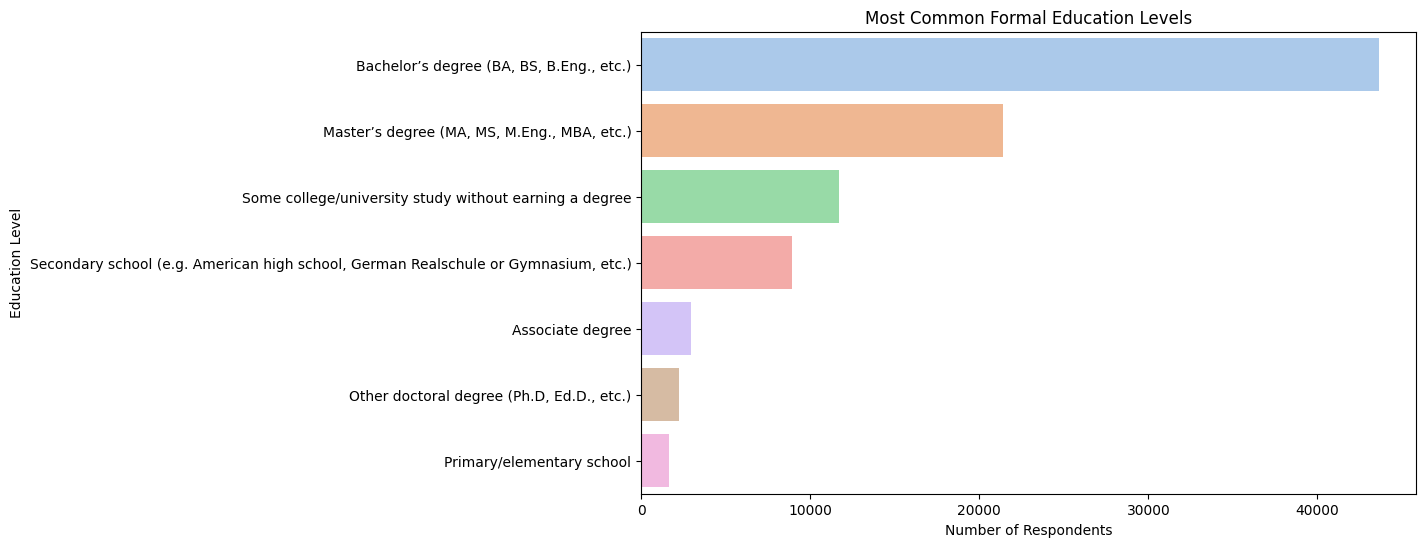

In [ ]:
edu_counts = df['FormalEducation'].value_counts().head(7)

plt.figure(figsize=(10,6))
sns.barplot(x=edu_counts.values, y=edu_counts.index, palette="pastel")
plt.title("Most Common Formal Education Levels")
plt.xlabel("Number of Respondents")
plt.ylabel("Education Level")
plt.show()


4. Do Developers Who Code as Hobby Earn More on Average?


/tmp/ipython-input-35-348128815.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Hobby', y='ConvertedSalary', data=hobby_salary, palette="Set2")


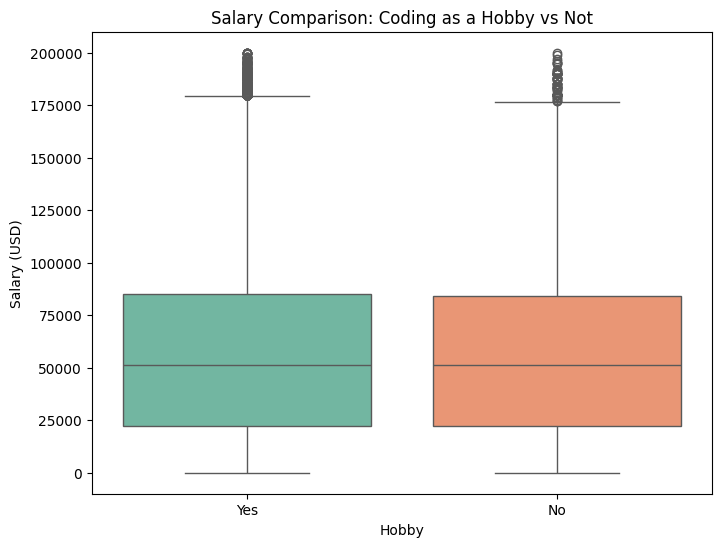

In [ ]:
hobby_salary = df[['Hobby', 'ConvertedSalary']].dropna()
hobby_salary = hobby_salary[hobby_salary['ConvertedSalary'] < 200000]


plt.figure(figsize=(8,6))
sns.boxplot(x='Hobby', y='ConvertedSalary', data=hobby_salary, palette="Set2")
plt.title("Salary Comparison: Coding as a Hobby vs Not")
plt.xlabel("Hobby")
plt.ylabel("Salary (USD)")
plt.show()


 5. Which Developer Role is Most Common?


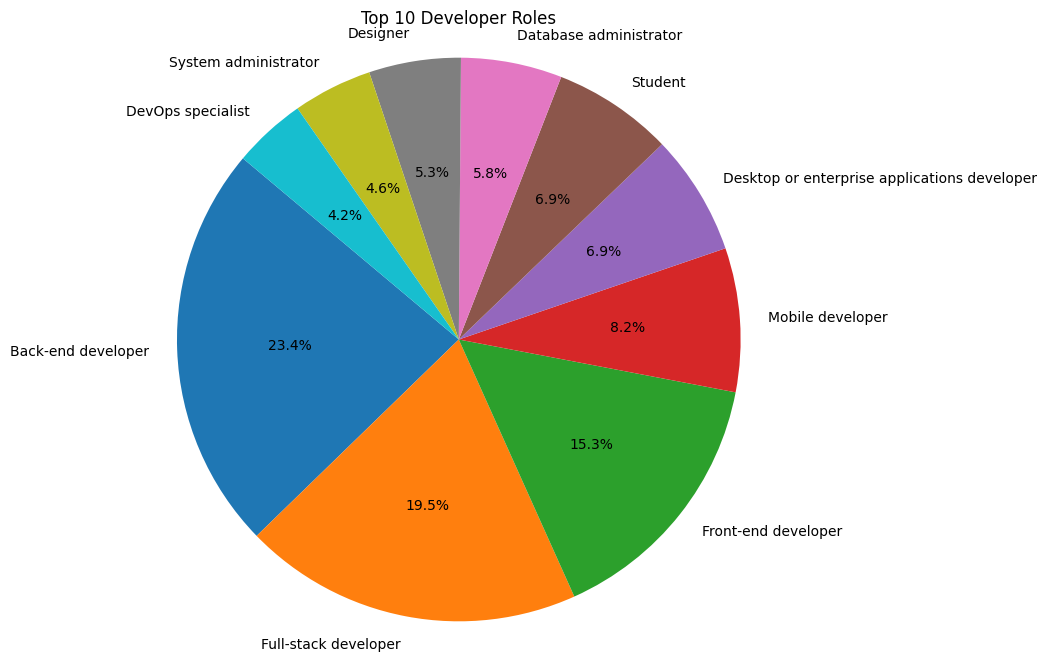

In [ ]:
# Count developer roles
roles_series = df['DevType'].dropna().str.split(';')
all_roles = Counter([role for sublist in roles_series for role in sublist])
top_roles = pd.Series(dict(all_roles)).sort_values(ascending=False).head(10)

plt.figure(figsize=(8,8))
plt.pie(top_roles.values, labels=top_roles.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Developer Roles")
plt.axis('equal')
plt.show()
